# Project 1:  Research Design Write-Up

## The aim of the project is to write a well-articulated problem statement and analysis plan that will be robust and reproducible using the UCLA admission dataset.

## Dataset
The dataset can be found at: [UCLA Admission Dataset](https://github.com/alexperrier/gads/blob/master/project_01/admissions.csv)

## Features of the Dataset
1. Outcome: 
    Admission status of the student
2. Covariate or Predictor Variables: 
    gre
    gpa
    prestige

## Purpose
The object of the study is to examine the various factors (GRE score, GPA and prestige of the undergraduate institution) that influence the admission status of a student at UCLA. 

## Data Dictionary

1. admit:  Status of admission of the student (1 = admitted, 0 = not admitted)
2. gre: GRE (Graduate Record Exam) score  (Range: 200-800)
3. gpa: GPA (grade point average) (Range: 0.0 - 4.0)
4. prestige: Relative prestige of the undergraduate’s alma mater (1: highest, 4: lowest)


## Problem Statement
1. Is there a link between undergraduate school prestige and admit status?
2. Is there a link between GPA and admit status?
3. Is there a link between GRE and admit status

In [3]:
#Load the packages and libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [11]:
# Load the UCLA dataset
df = pd.read_csv('./gads/project_01/admissions.csv')
df.shape[0]

400

In [13]:
#Basic Stats on the Dataset
df.describe()

/Users/thomas/anaconda2/envs/gads/lib/python3.5/site-packages/numpy/lib/function_base.py:3823: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,admit,gre,gpa,prestige
count,400.000000,398.000000,398.00000,399.000000
mean,0.317500,588.040201,3.39093,2.486216
std,0.466087,115.628513,0.38063,0.945333
min,0.000000,220.000000,2.26000,1.000000
25%,0.000000,NaN,NaN,NaN
50%,0.000000,NaN,NaN,NaN
75%,1.000000,NaN,NaN,NaN
max,1.000000,800.000000,4.00000,4.000000


## Initial Thoughts on the dataset

1. The average admit rate is 31.57%.
2. The average GRE score for all applicants is 588.
3. The average GPA for all applicants is 3.39.
4. The average prestige of the undergraduate institution of all applicants is 2.49.
5. There are 2 GRE scores, 2 GPA scores and 1 prestige score missing.

In [69]:
#Replace missing GRE scores with mean of available scores
gre_average = df[ ~df.gre.isnull() ]['gre'].mean()
df.loc[ df.gre.isnull(),'gre'] = gre_average
df[df.gre.isnull()].shape
gre_average

#Replace missing GPA scores with mean of available scores
gpa_average = df[ ~df.gpa.isnull() ]['gpa'].mean()
df.loc[ df.gpa.isnull(),'gpa'] = gpa_average
df[df.gpa.isnull()].shape
gpa_average

#Replace missing Prestige scores with mean of available scores
prestige_average = df[ ~df.prestige.isnull() ]['prestige'].mean()
df.loc[ df.prestige.isnull(),'prestige'] = prestige_average
df[df.prestige.isnull()].shape
prestige_average

#Check whether data is cleaned
df.describe()
mean_admit_rate = df.admit.mean()
mean_admit_rate

0.3175

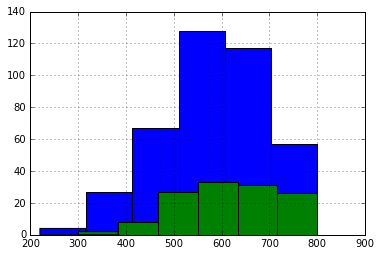

In [52]:
#Basic Plotting
#GRE scores distribution between all applicants and admitted students
df.gre.hist(bins=6,normed=False,label = 'All Applicants')
df[df.admit == 1].gre.hist(bins=6,normed=False,label = 'Admitted')

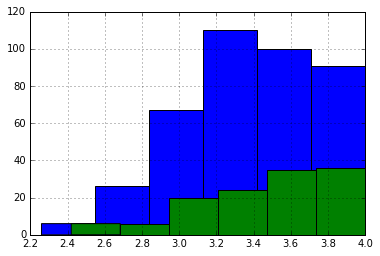

In [50]:
#GPA scores distribution between all applicants and admitted students
df.gpa.hist(bins=6,normed=False,label = 'All Applicants')
df[df.admit == 1].gpa.hist(bins=6,normed=False,label = 'Admitted')

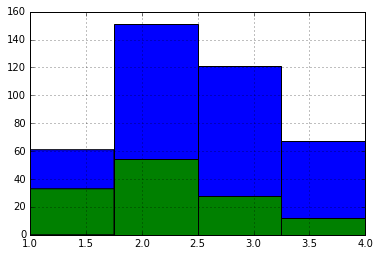

In [55]:
#Prestige score distribution between all applicants and admitted students
df.prestige.hist(bins=4,normed=False,label = 'All Applicants')
df[df.admit == 1].prestige.hist(bins=4,normed=False,label = 'Admitted')

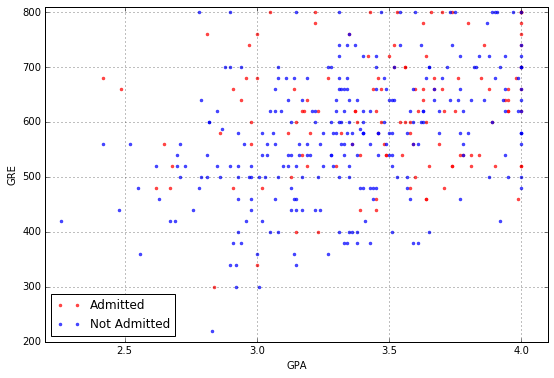

In [61]:
#Graphical Plot to check for a connection between GPA and GRE scores
cond = (df.admit == 1)
fig = plt.figure(figsize=(9,6))
plt.plot( df[cond].gpa, df[cond].gre,'.'  , color='r', alpha = 0.7, label ='Admitted')
plt.plot( df[~cond].gpa, df[~cond].gre,'.'  , color='b', alpha = 0.7, label ='Not Admitted')
plt.legend(loc='best')
plt.xlim([2.2,4.1])
plt.ylim([200,810])
plt.xlabel('GPA')
plt.ylabel('GRE')
plt.grid()
plt.show()

In [132]:
#High GRE Scores and high GPA
cond = ((df.gre >= 700) & (df.gpa >= 3.0))
ad_cond = ((cond) & df.admit ==1)
admit_rate = df[ad_cond].shape[0]/df[cond].shape[0]

#Greater chance 
higher_chance = (admit_rate-mean_admit_rate)/mean_admit_rate

print ('For the students with a GRE Score of 700+ and GPA of 3+, the acceptance rate is %s percent. \
This makes a student %s percent more likely to be accepted '%(admit_rate*100,higher_chance*100)) 

For the students with a GRE Score of 700+ and GPA of 3+, the acceptance rate is 40.27777777777778 percent. This makes a student 26.8591426072 percent more likely to be accepted 


In [133]:
cond = ((df.gre >= 750) & (df.gpa >= 3.5))
ad_cond = ((cond) & df.admit ==1)
admit_rate = df[ad_cond].shape[0]/df[cond].shape[0]

#Greater chance 
higher_chance = (admit_rate-mean_admit_rate)/mean_admit_rate

print ('For the students with a GRE Score of 750+ and GPA of 3.5+, the acceptance rate is %s percent. \
This makes a student %s percent more likely to be accepted '%(admit_rate*100,higher_chance*100)) 

For the students with a GRE Score of 750+ and GPA of 3.5+, the acceptance rate is 54.54545454545454 percent. This makes a student 71.7967072298 percent more likely to be accepted 


In [125]:
#Whether undergraduate school prestige has an influence
# Prestige = 1
cond = ((df.prestige==1))
ad_cond = ((cond)&(df.admit==1))
admit_rate = df[ad_cond].shape[0]/df[cond].shape[0]

#Greater chance 
higher_chance = (admit_rate-mean_admit_rate)/mean_admit_rate

print ('For the highest ranked school, the acceptance rate is %s percent. \
This makes a student %s percent more likely to be accepted '%(admit_rate*100,higher_chance*100)) 

For the highest ranked school, the acceptance rate is 54.09836065573771. This makes a student 70.3885374984 more likely to be accepted 


In [119]:
# Prestige = 2
#cond = ((df.gre >= 750) & (df.gpa >= 3.5) & (df.prestige==2))
cond = ((df.prestige==2))
ad_cond = ((cond)&(df.admit==1))
admit_rate = df[ad_cond].shape[0]/df[cond].shape[0]

#Greater chance 
higher_chance = (admit_rate-mean_admit_rate)/mean_admit_rate

print ('For the second-highest ranked school, the acceptance rate is %s percent. \
This makes a student %s percent more likely to be accepted '%(admit_rate*100,higher_chance*100)) 

For the second-highest ranked school, the acceptance rate is 35.333333333333336. This makes a student 11.2860892388  more likely to be accepted 


In [126]:
# Prestige = 3
#cond = ((df.gre >= 750) & (df.gpa >= 3.5) & (df.prestige==3))
cond = ((df.prestige==3))
ad_cond = ((cond)&(df.admit==1))
admit_rate = df[ad_cond].shape[0]/df[cond].shape[0]

#Greater chance 
higher_chance = (admit_rate-mean_admit_rate)/mean_admit_rate

print ('For the third-highest ranked school, the acceptance rate is %s percent. \
This makes a student %s percent  more likely to be accepted '%(admit_rate*100,higher_chance*100)) 

For the second-highest ranked school, the acceptance rate is 23.140495867768596. This makes a student -27.116548448  more likely to be accepted 


In [128]:
# Prestige = 4
#cond = ((df.gre >= 750) & (df.gpa >= 3.5) & (df.prestige==4))
cond = ((df.prestige==4))
ad_cond = ((cond)&(df.admit==1))
admit_rate = df[ad_cond].shape[0]/df[cond].shape[0]

#Greater chance 
higher_chance = (admit_rate-mean_admit_rate)/mean_admit_rate

print ('For the lowest ranked school, the acceptance rate is %s percent. \
This makes a student %s percent  more likely to be accepted '%(admit_rate*100,higher_chance*100)) 

For the lowest ranked school, the acceptance rate is 17.91044776119403 percent. This makes a student -43.5891409096 percent  more likely to be accepted 
